# Chronos Usage Example

## Loading Chronos Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import ChronosBoltModel
from samay.dataset import ChronosBoltDataset
# from tsfmproject.utils import load_args

# arg_path = "../config/timesfm.json"
# args = load_args(arg_path)
repo = "amazon/chronos-bolt-small"
chronos_model = ChronosBoltModel(repo=repo)


Loading Chronos model from Huggingface repository


## Define the datasets

In [2]:
train_dataset = ChronosBoltDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='train', batch_size=8)
val_dataset = ChronosBoltDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='test', batch_size=8)

## Visualize the zero-shot forecasting

/nethome/sli999/Samay/src/samay/model.py:377: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context = torch.tensor(context)
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


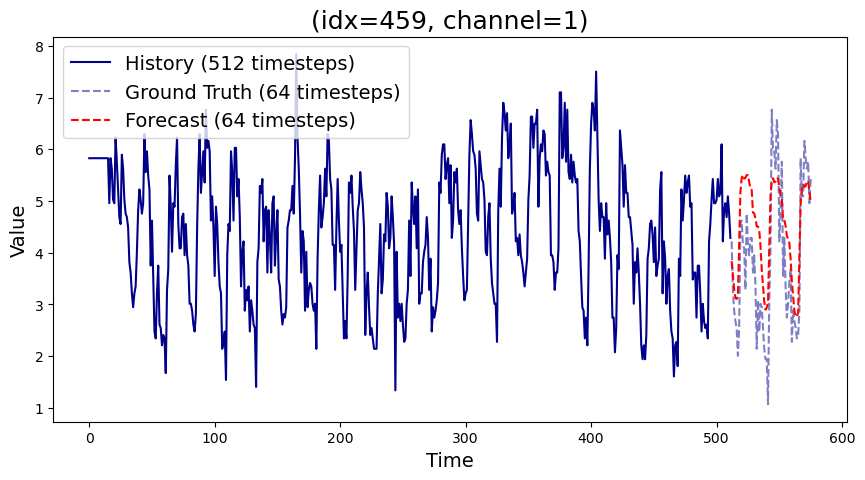

In [3]:
chronos_model.plot(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])

## Evaluate the zero-shot Chronos Model

In [4]:
metrics = chronos_model.evaluate(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])
print(metrics)

/nethome/sli999/Samay/src/samay/model.py:403: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context = torch.tensor(context)


{'mse': 9.816165257096971, 'mae': 1.5505705333008597, 'mase': 0.6868553650491053, 'mape': 1068.946606062415, 'rmse': 3.133076005636788, 'nrmse': 0.06823047999271774, 'smape': 0.3915590823851482, 'msis': 0.055670886691980684, 'nd': 0.4161415201466724, 'mwsq': 0.925224421444837, 'crps': 52.30858828869275}


## Finetune Chronos Model on the ETT dataset

In [5]:
chronos_model.finetune(train_dataset)

Epoch 0, Loss: 31.315279560644882
Epoch 1, Loss: 29.317381985176432
Epoch 2, Loss: 27.809596066026398
Epoch 3, Loss: 27.65292414019492
Epoch 4, Loss: 26.49469400755572
Epoch 5, Loss: 24.594229495177036
Epoch 6, Loss: 30.647176283666973
Epoch 7, Loss: 29.016727934256924
Epoch 8, Loss: 38.066322065910256
Epoch 9, Loss: 30.110412393266436


## Evaluate the Finetuned Chronos Model

In [6]:
metrics = chronos_model.evaluate(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])
print(metrics)

{'mse': 9.847869427146916, 'mae': 1.6677817254509013, 'mase': 0.7387763415174724, 'mape': 1240.5827657721693, 'rmse': 3.1381315184591796, 'nrmse': 0.06834057628973081, 'smape': 0.4250752488988162, 'msis': 0.06201916959977398, 'nd': 0.44759861457222333, 'mwsq': 1.6265509406813903, 'crps': 54.70985992659528}
